In [51]:
import numpy as np 
import matplotlib.pyplot as plt 
import tqdm

In [2]:
from scipy import constants

In [3]:
Z1 = 2  # Atomic number of alpha particle
Z2 = 79  # Atomic number of gold nucleus
e = constants.e  # Elementary charge (C)
epsilon_0 = constants.epsilon_0  # Permittivity of free space (F/m)
(m, _, _) = constants.physical_constants['alpha particle mass']  # Mass of alpha particle (kg)
k = 10  # Initial distance in X direction (sufficiently large)
pi = constants.pi

In [4]:
b = 2  # Impact parameter (can be varied)
# Set initial condition 
X_0 = -k
Y_0 = b
V_X0 = 1.0
V_Y0 = 0.0
delta_tau = 0.001

In [5]:
V_X = np.array([V_X0])
V_Y = np.array([V_Y0])
X = np.array([X_0])
Y = np.array([Y_0])

In [22]:
def cal_X_Y(b):
    X_0 = -k
    Y_0 = b
    V_X0 = 1.0
    V_Y0 = 0.0
    delta_tau = 0.001
    V_X = np.array([V_X0])
    V_Y = np.array([V_Y0])
    X = np.array([X_0])
    Y = np.array([Y_0])
    while (np.sqrt(X[-1]**2 + Y[-1]**2) < 12): # R < 15
        X = np.append(X, X[-1] + delta_tau * V_X[-1])
        Y = np.append(Y, Y[-1] + delta_tau * V_Y[-1])
        A_X = X[-1]/(2*(np.sqrt(X[-1]**2 + Y[-1]**2)**3))
        A_Y = Y[-1]/(2*(np.sqrt(X[-1]**2 + Y[-1]**2)**3))
        V_X = np.append(V_X, V_X[-1] + delta_tau * A_X)
        V_Y = np.append(V_Y, V_Y[-1] + delta_tau * A_Y)
    return (X, Y, V_X, V_Y)

In [23]:
X

array([-10.        ,  -9.999     ,  -9.998     , ...,   9.71789282,
         9.71879523,   9.71969764])

In [24]:
Y

array([2.        , 2.        , 2.        , ..., 7.03678511, 7.03723274,
       7.03768038])

0.1
0.25
0.5
1
2


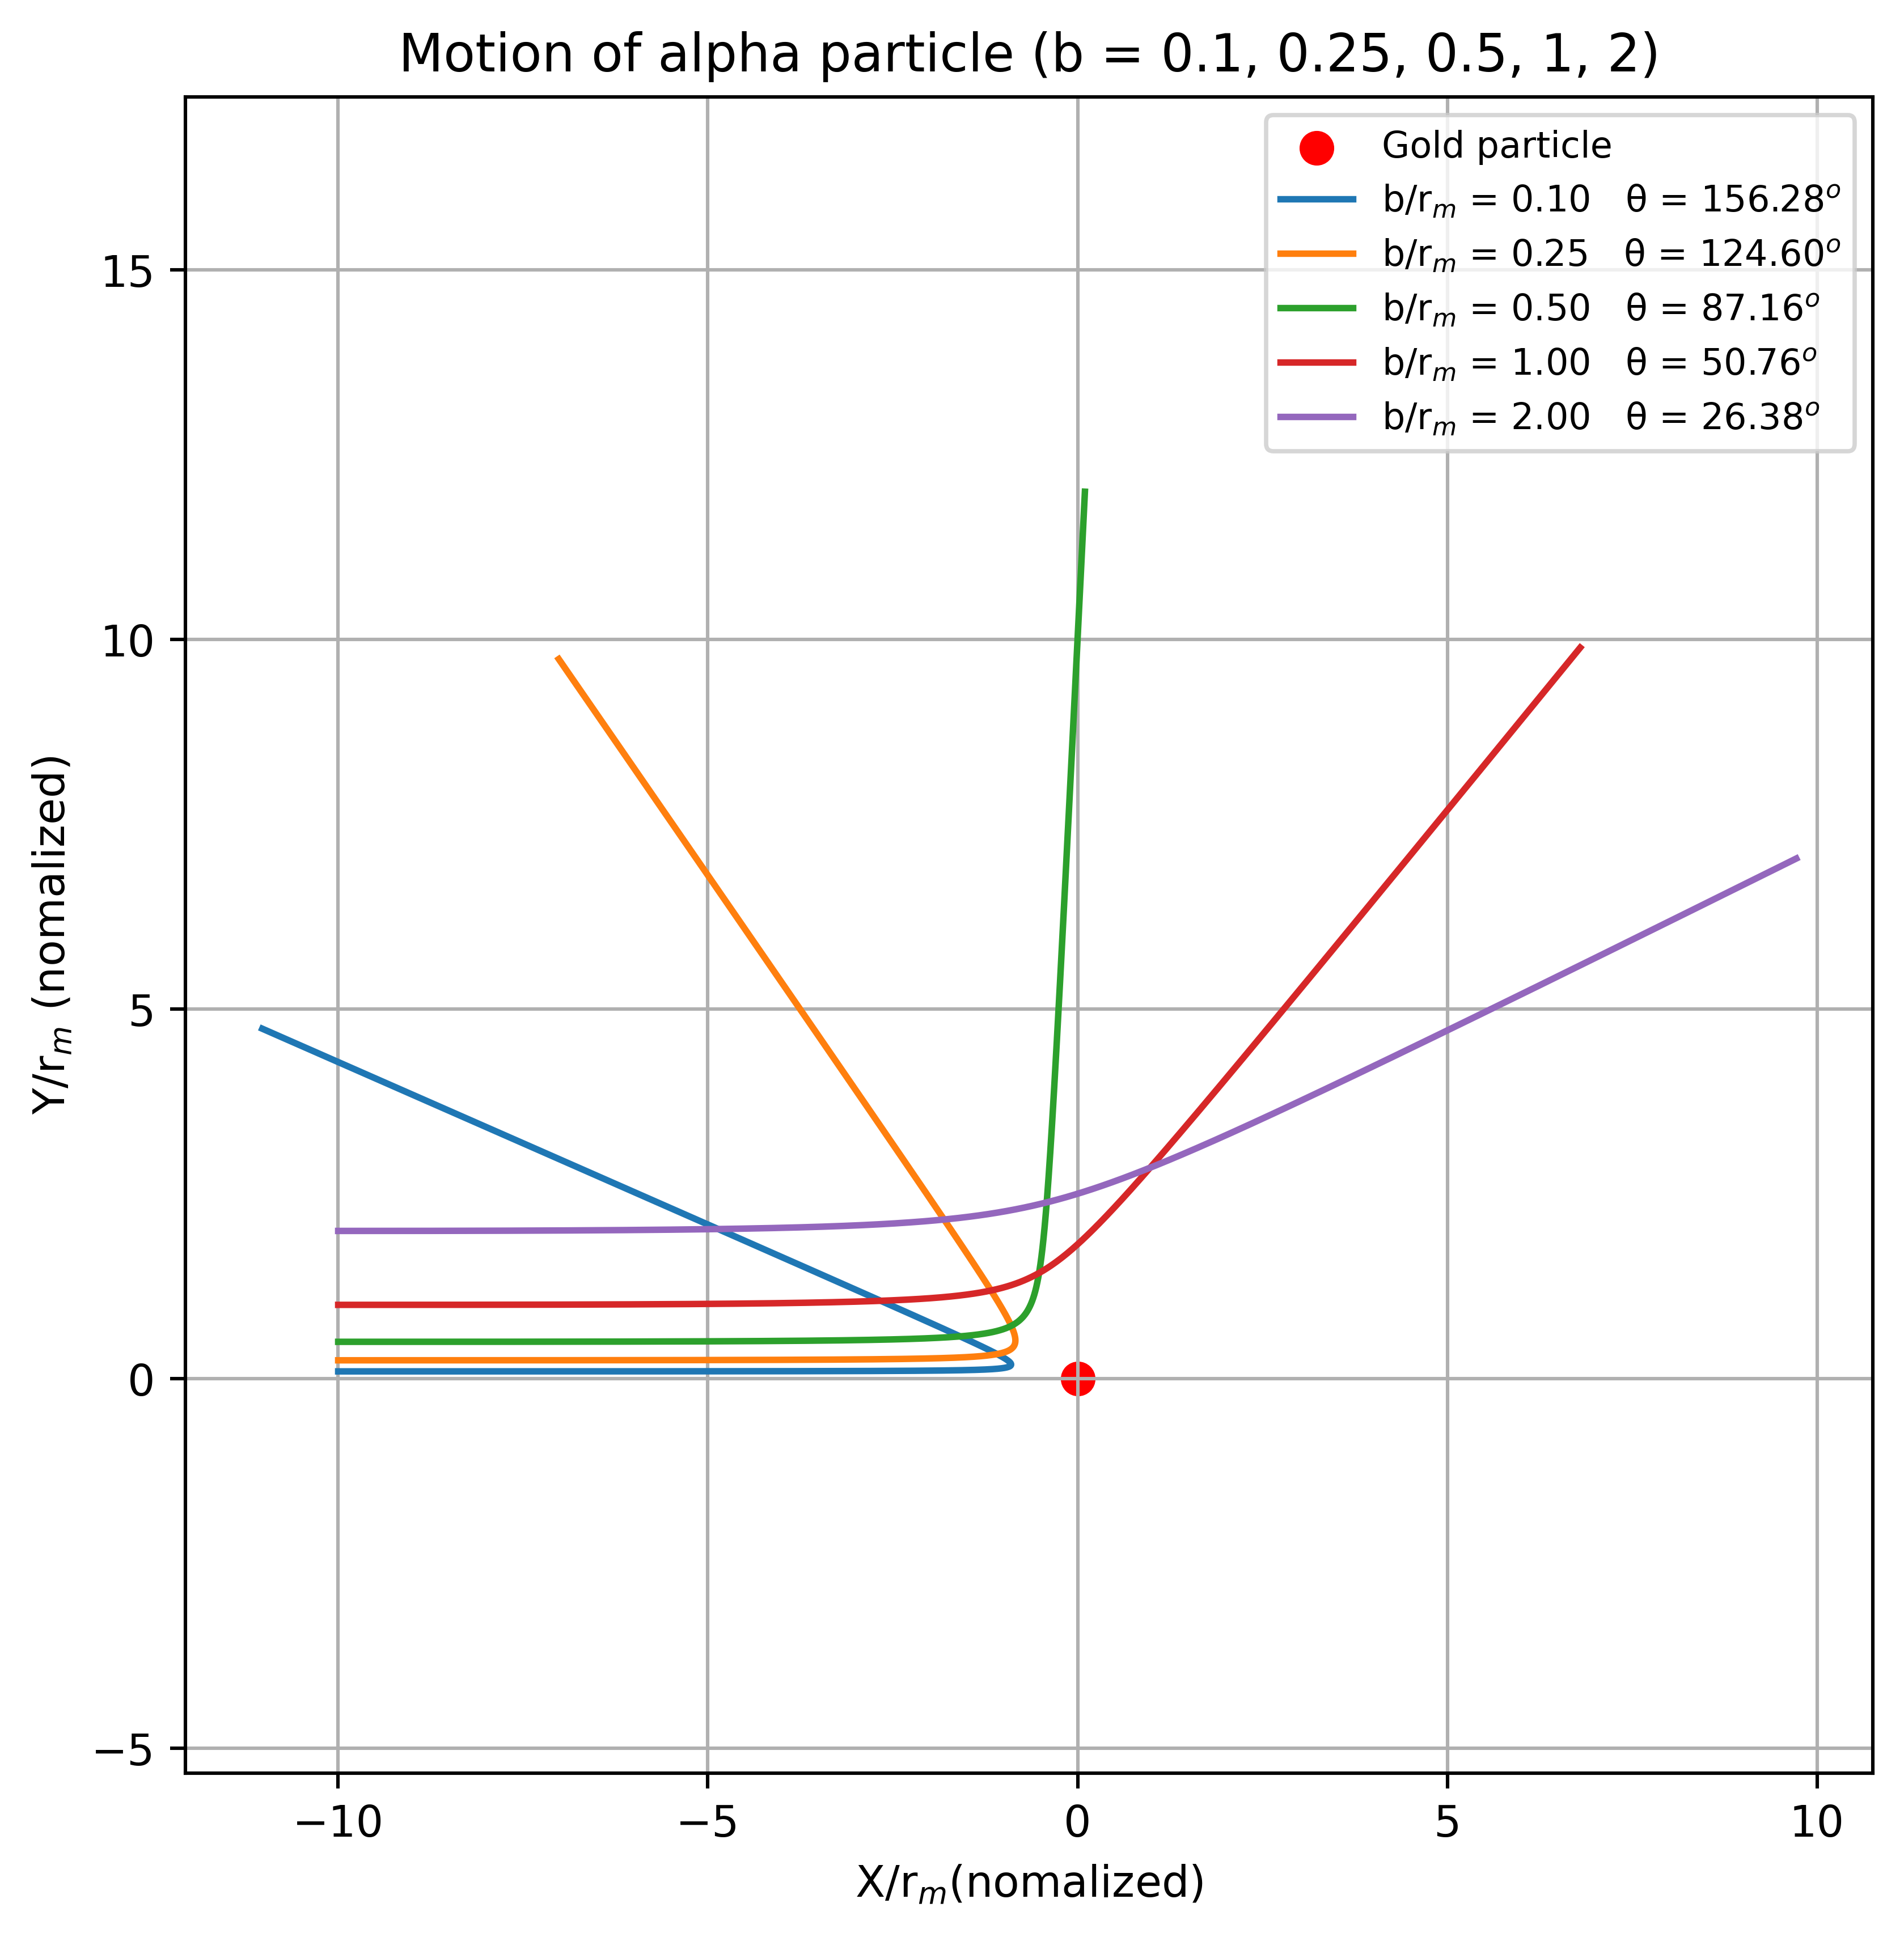

In [124]:
plt.figure(figsize=(38.4/5.5, 38.4/5.5), dpi=550)
plt.scatter([0], [0], marker='o', linewidths=2, label='Gold particle', c='r')
plt.axis('equal')
plt.grid()
plt.title(f"Motion of alpha particle (b = 0.1, 0.25, 0.5, 1, 2)")
for i in [0.1,0.25,0.5,1,2]:
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    theta = np.arctan(V_Y[-1] / V_X[-1])
    if theta < 0:
        theta = np.pi - np.abs(theta)
    plt.plot(X, Y, label='b/r$_m$ = {:.2f}   '.format(i) + 'θ = {:.2f}$^o$'.format(theta*180/pi))
    print(i)
plt.xlabel("X/r$_m$(nomalized)")
plt.ylabel("Y/r$_m$ (nomalized)")
plt.legend(fontsize="small")

100%|███████████████████████████████████████████████████████| 50/50 [00:32<00:00,  1.56it/s]


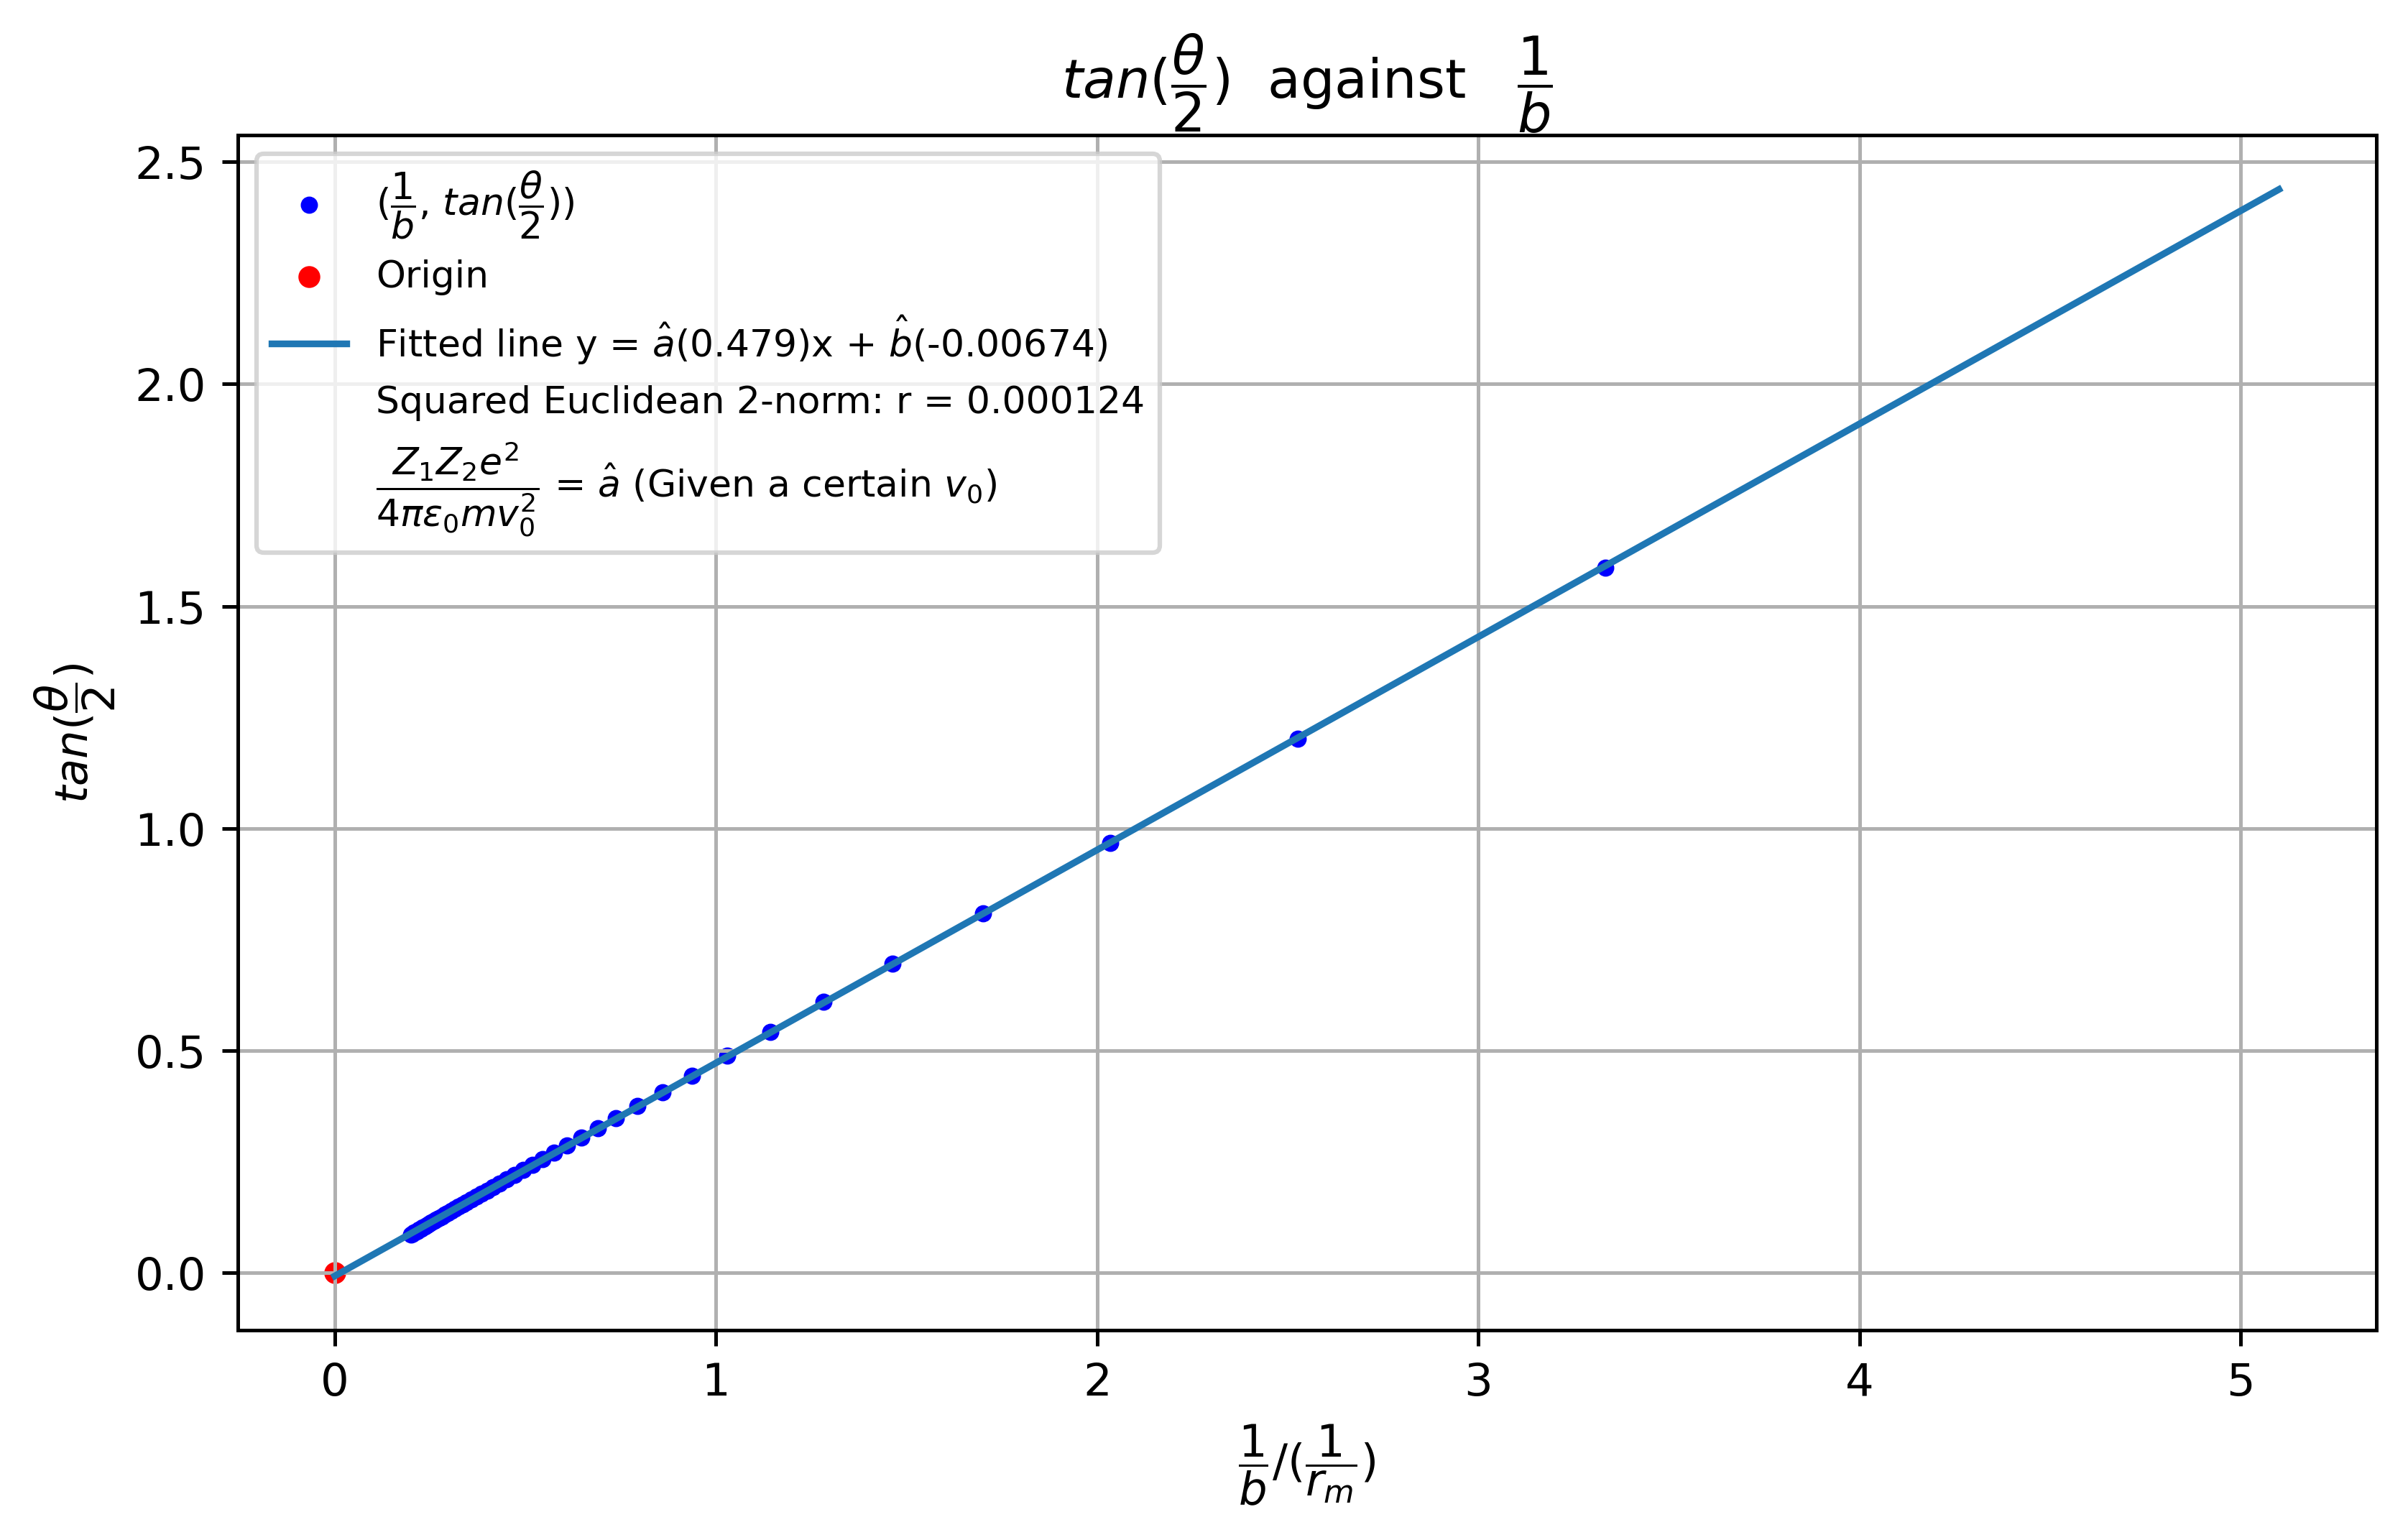

In [123]:
plt.figure(figsize=(38.4/4.5, 21.6/4.5), dpi=450)
plt.xlabel(r"$\dfrac{1}{b} /(\dfrac{1}{r_m})$",)
plt.title("$tan(\\dfrac{θ}{2})$  against   $\\dfrac{1}{b}$")
plt.ylabel(r'$tan(\dfrac{θ}{2})$')
tan_theta_de_2 = np.array([])
b_devided_1 = np.array([])
for i in tqdm.tqdm(np.linspace(0.3,5,50)):
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    theta = np.arctan(V_Y[-1] / V_X[-1])
    if theta < 0:
        theta = np.pi - np.abs(theta)
    tan_theta_de_2 = np.append(tan_theta_de_2, np.tan(theta/2))
    b_devided_1 = np.append(b_devided_1, 1/i)
    #plt.scatter(1/i, np.tan(theta/2 - 1e-8), c='b', s=10, label='($\\dfrac{1}{b}$, $tan(\\dfrac{θ}{2})$')
[a, b] = np.linalg.lstsq(np.vstack([b_devided_1 , np.ones(len(b_devided_1))]).T, tan_theta_de_2)[0]
plt.grid()
plt.scatter(b_devided_1, tan_theta_de_2, c='b', s=8, label='($\\dfrac{1}{b}$, $tan(\\dfrac{θ}{2}$))')
plt.scatter(0,0, s=15, c='r', label="Origin")
plt.plot(np.linspace(0,5.1, 40), a * np.linspace(0,5.1, 40) + b, label="Fitted line y = $\\^a$(0.479)x + $\\^b$(-0.00674)")
plt.scatter(0,0, label="Squared Euclidean 2-norm: r = 0.000124",c='black',s=0)
plt.scatter(0,0, label="$\\dfrac{Z_1 Z_2 e^2}{4 \\pi \\epsilon_0 m v_0^2}$ = $\\^a$ (Given a certain $v_0$)",c='black',s=0)
plt.legend(fontsize='small')

In [117]:
np.linalg.lstsq(np.vstack([b_devided_1 , np.ones(len(b_devided_1))]).T, tan_theta_de_2)

(array([ 0.47931386, -0.0067472 ]),
 array([0.00012417]),
 np.int32(2),
 array([8.7231768 , 3.56777856]))

In [125]:
E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)

In [139]:
E[0:100]

array([0.54902903, 0.54902903, 0.54902903, 0.54902903, 0.54902903,
       0.54902903, 0.54902903, 0.54902903, 0.54902903, 0.54902903,
       0.54902903, 0.54902903, 0.54902903, 0.54902903, 0.54902903,
       0.54902903, 0.54902903, 0.54902903, 0.54902903, 0.54902903,
       0.54902903, 0.54902902, 0.54902902, 0.54902902, 0.54902902,
       0.54902902, 0.54902902, 0.54902902, 0.54902902, 0.54902902,
       0.54902902, 0.54902902, 0.54902902, 0.54902902, 0.54902902,
       0.54902902, 0.54902902, 0.54902902, 0.54902902, 0.54902902,
       0.54902902, 0.54902902, 0.54902902, 0.54902902, 0.54902901,
       0.54902901, 0.54902901, 0.54902901, 0.54902901, 0.54902901,
       0.54902901, 0.54902901, 0.54902901, 0.54902901, 0.54902901,
       0.54902901, 0.54902901, 0.54902901, 0.54902901, 0.54902901,
       0.54902901, 0.54902901, 0.54902901, 0.54902901, 0.54902901,
       0.54902901, 0.549029  , 0.549029  , 0.549029  , 0.549029  ,
       0.549029  , 0.549029  , 0.549029  , 0.549029  , 0.54902

In [127]:
L = X*V_Y-Y*V_X

In [138]:
L[0:100]

array([-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2.])